## Ejecutar cr2 carga Variables mensuales:

- prec = 'Precipitacion' 
- caud = 'Caudal'
- temp = 'Temperatura'
- tmax = 'Temperatura max'
- tmin = 'Temperatura min'

In [1]:
# Equivalente a lo siguiente
from cr2 import *

prec = Cr2('monthly', 'p', 'data.json')
caud = Cr2('monthly', 'q', 'data.json')
temp = Cr2('monthly', 't', 'data.json')
tmin = Cr2('monthly', 'tmin', 'data.json')
tmax = Cr2('monthly', 'tmax', 'data.json')

%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.externals import joblib

In [3]:
### Listados de métodos para objeto 'prec'
print dir(caud)

['__doc__', '__init__', '__module__', 'busca', 'df', 'filename', 'get_df', 'get_meta', 'iname', 'kname', 'meta', 'open_sources', 'plot_annual', 'plot_month', 'plot_simple', 'units', 'var', 'varname']


### Buscar Estacion por 'nombre'

In [4]:
prec.busca('Elqui')

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones
172,04320001,DGA,dga_web,Rio Elqui En Algarrobal,760,-29.9953,-70.5867,43,Rio Elqui,432,R. Elqui Medio,2011-01-01 00:00:00,2016-05-01 00:00:00,63
177,04311003,DGA,dga_web,Pisco Elqui Dmc,1250,-30.1217,-70.4933,43,Rio Elqui,431,Rio Claro,1977-01-01 00:00:00,2015-12-01 00:00:00,451
837,300004,DMC,dmc_anuarios,Pisco Elqui Fundo,1185,-30.0953,-70.5008,41,Rio Los Choros,412,Q. Los Choros Entre Q. Del Pelicano Y Desemboc...,1980-01-01 00:00:00,1991-08-01 00:00:00,140
838,300005,DMC,dmc_anuarios,Pisco Elqui Reten,1245,-30.1236,-70.4939,41,Rio Los Choros,412,Q. Los Choros Entre Q. Del Pelicano Y Desemboc...,1980-01-01 00:00:00,2011-10-01 00:00:00,311


In [5]:
caud.busca('Elqui')

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones
135,04110001,DGA,dga_web,Rio Elqui En Molle,0,-29.4833,-70.9833,41,Rio Los Choros,411,Quebrada Del Pelicano,1946-09-01 00:00:00,1951-04-01 00:00:00,51
138,04331001,DGA,dga_web,Rio Elqui En Punta De Piedra,160,-29.8667,-71.1,43,Rio Elqui,433,Rio Elqui Bajo (Entre Q. El Arrayan Y Desemb),1952-07-01 00:00:00,1965-05-01 00:00:00,131
139,04335001,DGA,dga_web,Rio Elqui En La Serena,20,-29.8931,-71.2514,43,Rio Elqui,433,Rio Elqui Bajo (Entre Q. El Arrayan Y Desemb),1985-02-01 00:00:00,2015-08-01 00:00:00,293
145,04323001,DGA,dga_web,Rio Elqui En Almendral,395,-29.9811,-70.8981,43,Rio Elqui,432,"Rio Elqui Medio (Jta Turbio, Claro Y Q El Arra...",1930-01-01 00:00:00,2015-11-01 00:00:00,733
147,04320001,DGA,dga_web,Rio Elqui En Algarrobal,760,-29.9953,-70.5867,43,Rio Elqui,432,R. Elqui Medio,1930-01-01 00:00:00,2016-04-01 00:00:00,804
148,04323002,DGA,dga_web,Rio Elqui En Puclaro,445,-30.0,-70.85,43,Rio Elqui,432,"Rio Elqui Medio (Jta Turbio, Claro Y Q El Arra...",1963-01-01 00:00:00,1965-08-01 00:00:00,32
149,04323003,DGA,dga_web,Rio Elqui En Gualliguaica,490,-30.0208,-70.7992,43,Rio Elqui,432,"Rio Elqui Medio (Jta Turbio, Claro Y Q El Arra...",1946-08-01 00:00:00,1965-07-01 00:00:00,151
152,04301003,DGA,dga_web,Rio La Laguna En Nueva Elqui,3100,-30.2,-70.0667,43,Rio Elqui,430,Rio Turbio,1930-05-01 00:00:00,1931-01-01 00:00:00,9


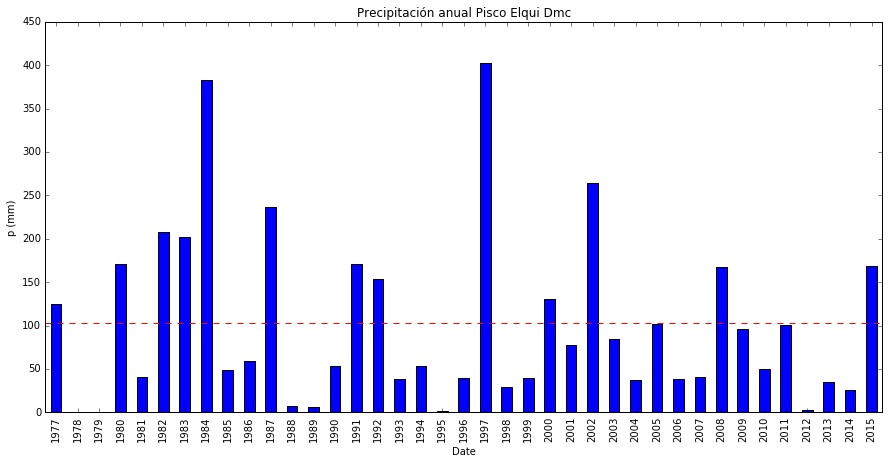

In [6]:
prec.plot_annual(177, figsize=(15,7))

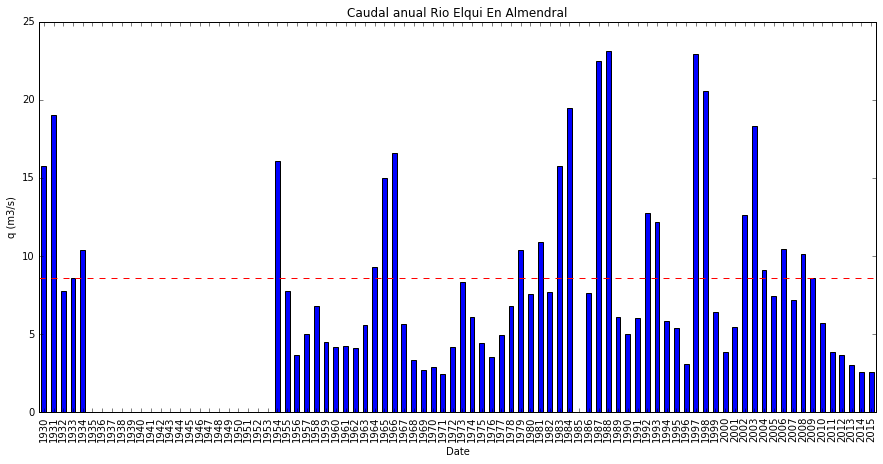

In [7]:
caud.plot_annual(145, figsize=(15,7))

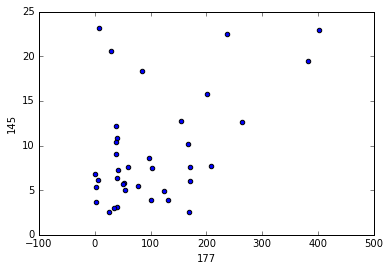

In [8]:
prec_n , caud_n = 177 , 145
prec1 = prec.df.loc[:,prec_n].dropna().resample('A').sum()
caud1 = caud.df.loc[:,caud_n].dropna().resample('A').mean()
df = pd.concat([prec1,caud1], axis=1)
df.plot.scatter(prec_n, caud_n)

In [9]:
# Elimina filas con datos faltantes y indice lo lleva a agnos
df = df.dropna().to_period('A')

In [10]:
# Crea df desde noaa
url = 'http://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt'
nino34 = pd.read_csv(url, sep='\s+')

# Crea columna con inicio mes
nino34['Date'] = nino34.apply(lambda row: "%.f-%.f-1"%(row['YR'],row['MON']), axis=1)

# nino34 drop SEAS y YR
nino34.drop(['MON', 'YR'], axis=1, inplace=True)

# Indice Date
nino34['Date']  = pd.to_datetime(nino34['Date'])
nino34.set_index('Date', inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F46F8D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010B89A90>], dtype=object)

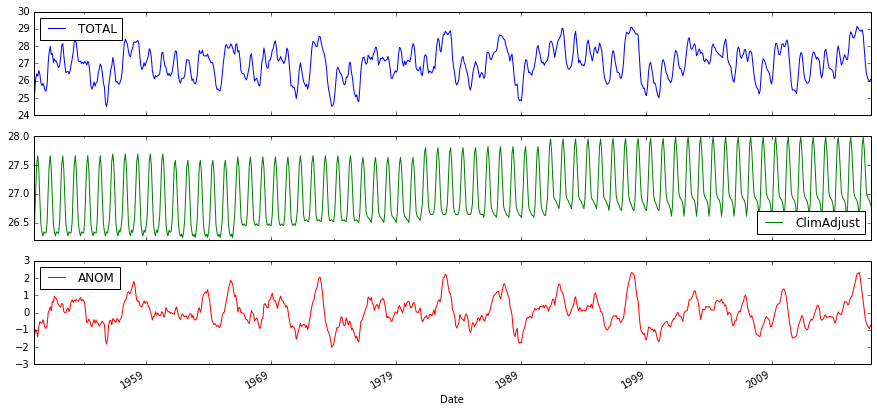

In [11]:
nino34.plot(subplots=True, figsize=(15,7))

Date
1980-12-31    171.3
1981-12-31     40.5
1982-12-31    208.1
1983-12-31    202.0
1984-12-31    382.5
1985-12-31     49.2
Freq: A-DEC, Name: 177, dtype: float64

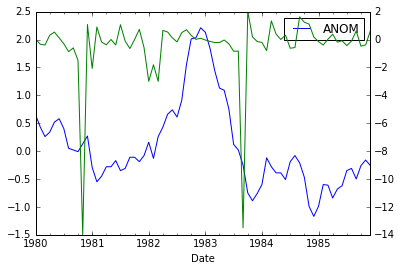

In [12]:
period = slice('1980','1985')
ax = nino34.ANOM[period].plot(legend=True)
nino34.ANOM.pct_change()[period].plot(ax=ax, secondary_y=True)
prec1[period]

Date
1985-12-31     49.2
1986-12-31     58.7
1987-12-31    236.2
1988-12-31      7.7
1989-12-31      6.0
Freq: A-DEC, Name: 177, dtype: float64

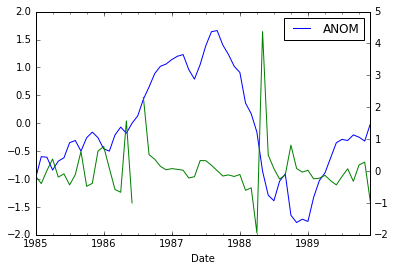

In [13]:
period = slice('1985','1989')
ax = nino34.ANOM[period].plot(legend=True)
nino34.ANOM.pct_change()[period].plot(ax=ax, secondary_y=True)
prec1[period]

Date
1995-12-31      2.0
1996-12-31     40.0
1997-12-31    402.7
1998-12-31     29.2
1999-12-31     39.7
Freq: A-DEC, Name: 177, dtype: float64

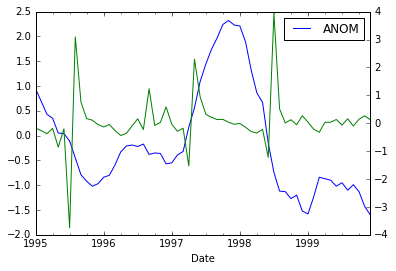

In [19]:
period = slice('1995','1999')
ax = nino34.ANOM[period].plot(legend=True)
nino34.ANOM.pct_change()[period].plot(ax=ax, secondary_y=True)
prec1[period]

Date
1999-12-31     39.7
2000-12-31    130.5
2001-12-31     77.4
2002-12-31    263.7
2003-12-31     84.1
2004-12-31     37.5
Freq: A-DEC, Name: 177, dtype: float64

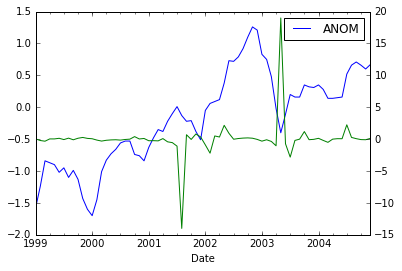

In [15]:
period = slice('1999','2004')
ax = nino34.ANOM[period].plot(legend=True)
nino34.ANOM.pct_change()[period].plot(ax=ax, secondary_y=True)
prec1[period]

Date
2005-12-31    101.9
2006-12-31     37.8
2007-12-31     41.1
2008-12-31    167.1
2009-12-31     96.5
2010-12-31     50.2
Freq: A-DEC, Name: 177, dtype: float64

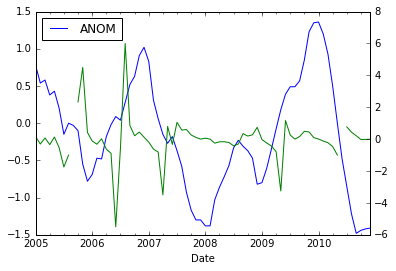

In [16]:
period = slice('2005','2010')
ax = nino34.ANOM[period].plot(legend=True)
nino34.ANOM.pct_change()[period].plot(ax=ax, secondary_y=True)
prec1[period]

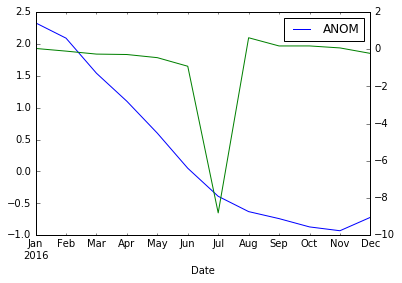

In [17]:
period = slice('2016','2017')
ax = nino34.ANOM[period].plot(legend=True)
nino34.ANOM.pct_change()[period].plot(ax=ax, secondary_y=True)
# Hipotesis: 
# Si inicio agno ANOM negativa precedida de un pulso (cambio tendencia) al alza => Pbb de agno humedo es alta
# Se debe dar una sicronía entre ondas (temperatura del mar con ciclo hidrológico) si ambos entran en resonancia 
# se amplifica el efecto de evaporación y formación de frentes de mal tiempo en invierno.

# TODO: Se necesita hacer un analisis de test de hipotesis u otra técnica mejor bayeasiana 

# Si se supone que la hipotesis valida, ANOM indica que es muy probable que el agno sea humedo
# si mantiene su tendencia al alza.